In [4]:
# youtube vedio for this https://www.youtube.com/watch?v=vV12dGe_Fho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('hourly electricity consumption.csv')
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [6]:
df = df.set_index('Datetime')

In [7]:

df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


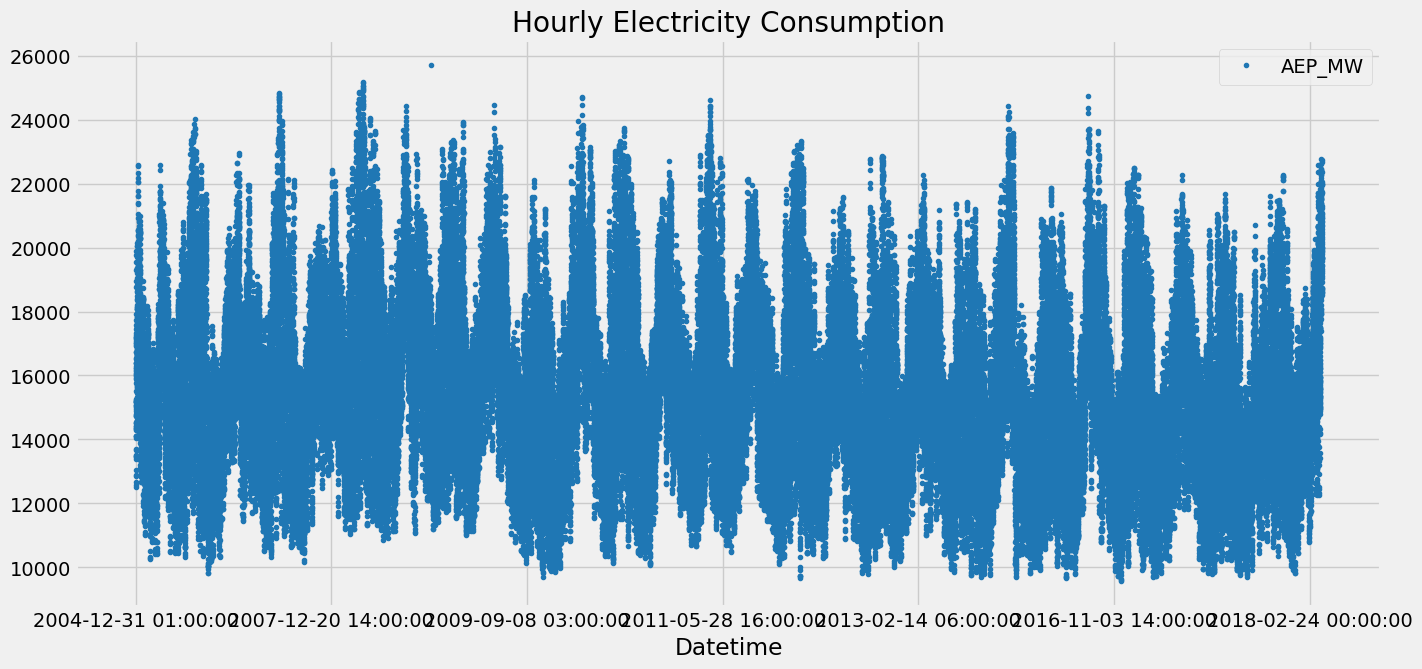

In [8]:
df.plot(style='.', figsize=(15, 7), color=color_pal[0], title='Hourly Electricity Consumption')
plt.show()

In [9]:
df.index

Index(['2004-12-31 01:00:00', '2004-12-31 02:00:00', '2004-12-31 03:00:00',
       '2004-12-31 04:00:00', '2004-12-31 05:00:00', '2004-12-31 06:00:00',
       '2004-12-31 07:00:00', '2004-12-31 08:00:00', '2004-12-31 09:00:00',
       '2004-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=121273)

In [10]:
pd.to_datetime(df.index)

DatetimeIndex(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
               '2004-12-31 03:00:00', '2004-12-31 04:00:00',
               '2004-12-31 05:00:00', '2004-12-31 06:00:00',
               '2004-12-31 07:00:00', '2004-12-31 08:00:00',
               '2004-12-31 09:00:00', '2004-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=121273, freq=None)

In [11]:
df.index = pd.to_datetime(df.index)

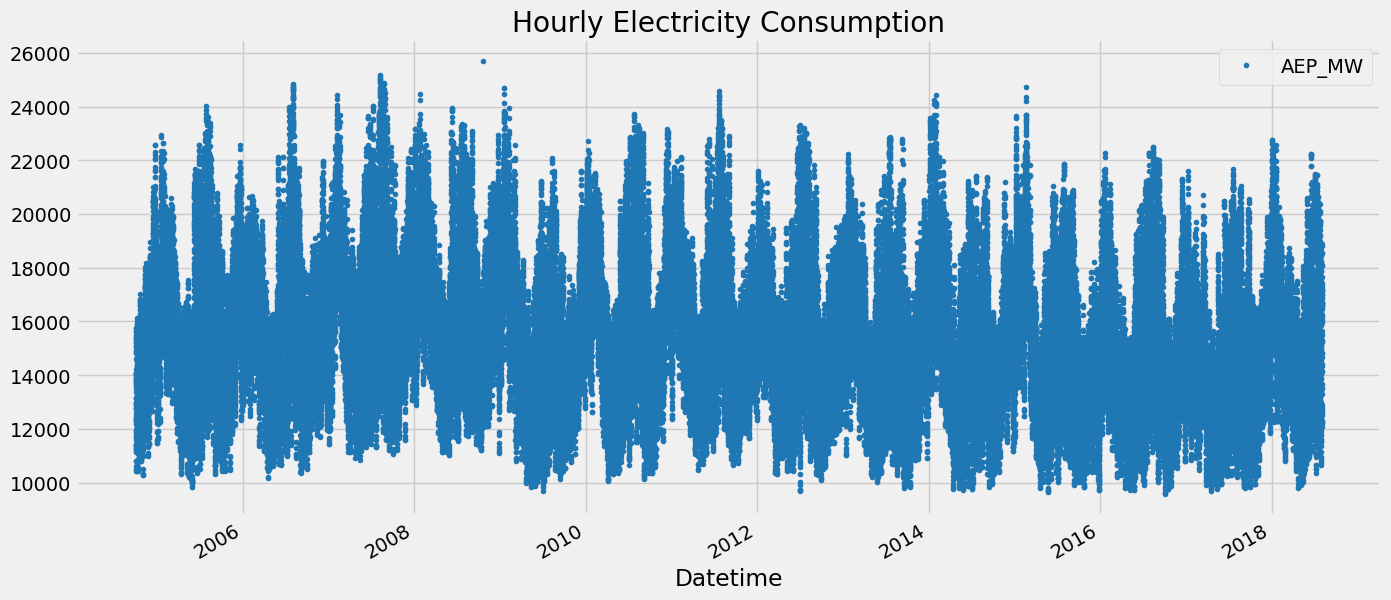

In [12]:
df.plot(style='.',
        figsize=(15, 7),
        color=color_pal[0],
        title='Hourly Electricity Consumption')
plt.show()

Train \ test split

In [13]:
train = df.loc[df.index < '2016-01-01']
test = df.loc[df.index >= '2016-01-01']

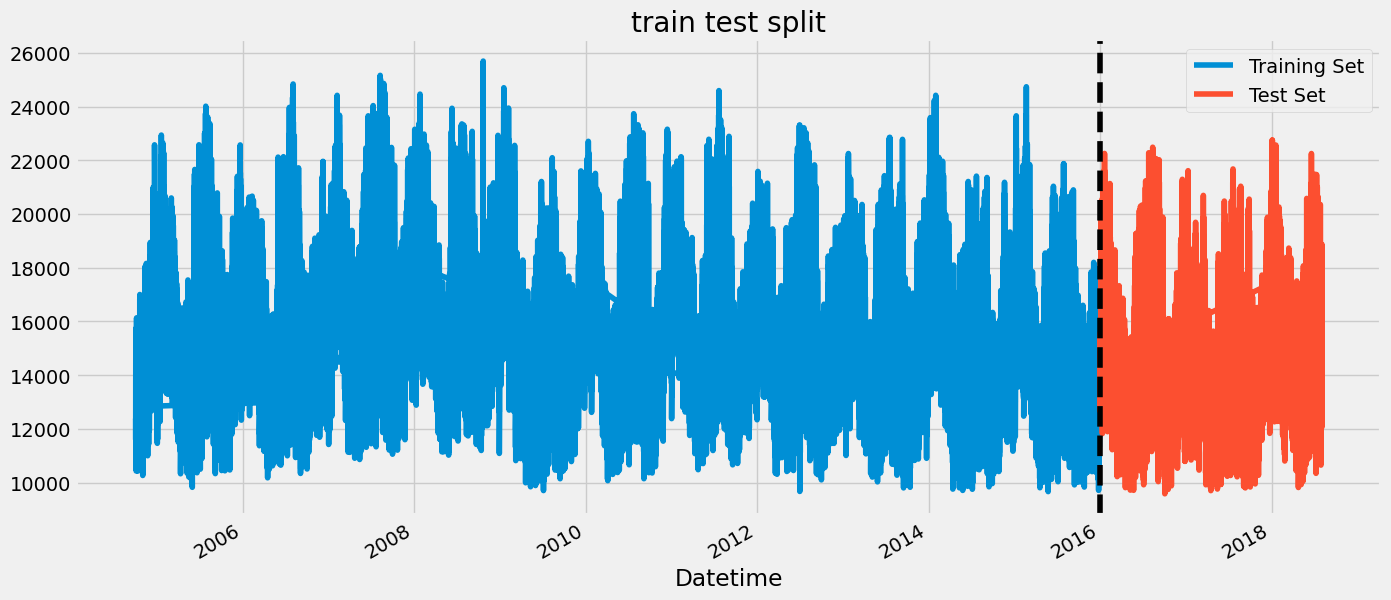

<Axes: title={'center': 'train test split'}, xlabel='Datetime'>

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))
train.plot(ax=ax, label='Training Set', title='train test split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2016-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()
test.plot(ax=ax, label='Test Set')

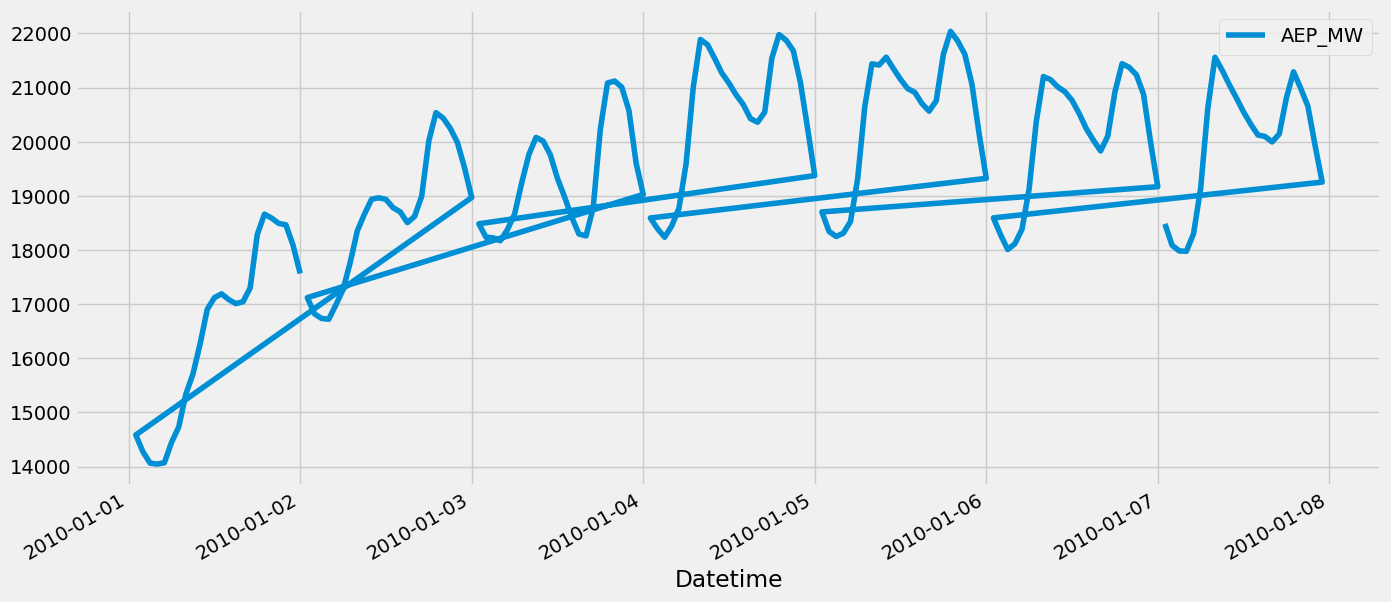

In [15]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15, 7))
plt.show()

Feature Creation

In [27]:
def create_features(df):
  '''
  Create time series features based on time series index.
  '''
  df = df.copy()

  df['hour'] = df.index.hour
  df['dayofweak'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df

df = create_features(df)

Visualize our Feature / Target Relationship

/tmp/ipython-input-3903999150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'hour', y = 'AEP_MW', palette = 'coolwarm')


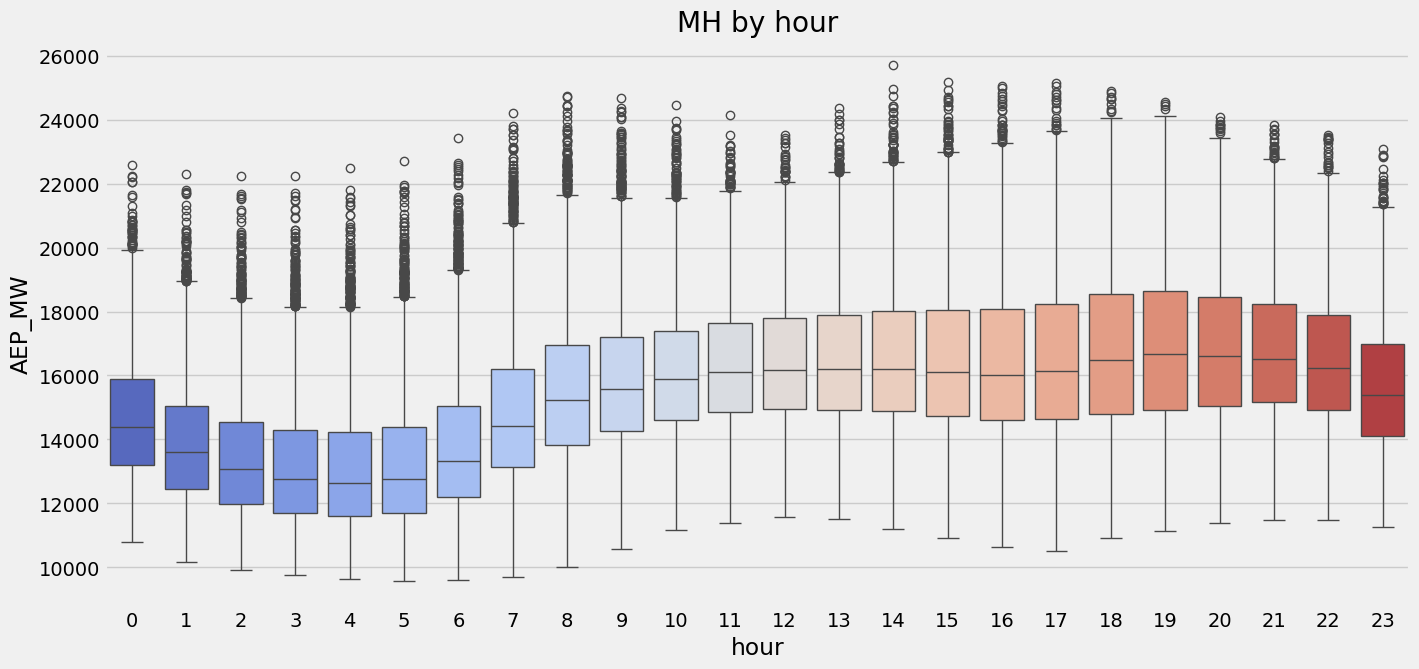

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data = df, x = 'hour', y = 'AEP_MW', palette = 'coolwarm')
ax.set_title('MH by hour')
plt.show()

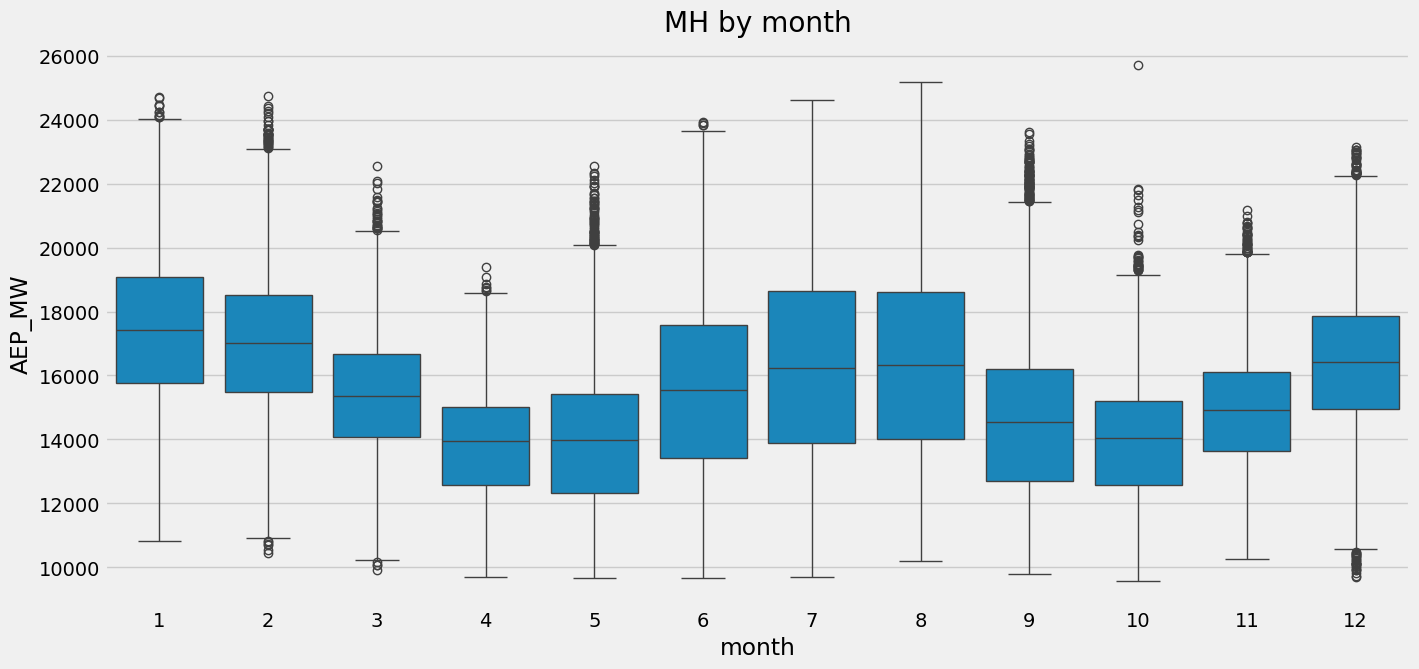

In [25]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data = df, x = 'month', y = 'AEP_MW')
ax.set_title('MH by month')
plt.show()

# Create our model


In [26]:
from sklearn.metrics import mean_squared_error


In [29]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'dayofweak', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'AEP_MW'

In [30]:
x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [33]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate= 0.01)
reg.fit(x_train, y_train,
        eval_set = [(x_test, y_test)],
        verbose = 100)

[0]	validation_0-rmse:2614.77276
[100]	validation_0-rmse:1891.51903
[200]	validation_0-rmse:1761.33352
[300]	validation_0-rmse:1735.55517
[383]	validation_0-rmse:1735.99252


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
x_train

,hour,dayofweak,quarter,month,year,dayofyear
Datetime,,,,,,
2004-12-31 01:00:00,1,4,4,12,2004,366
2004-12-31 02:00:00,2,4,4,12,2004,366
2004-12-31 03:00:00,3,4,4,12,2004,366
2004-12-31 04:00:00,4,4,4,12,2004,366
2004-12-31 05:00:00,5,4,4,12,2004,366
...,...,...,...,...,...,...
2015-01-01 20:00:00,20,3,1,1,2015,1
2015-01-01 21:00:00,21,3,1,1,2015,1
2015-01-01 22:00:00,22,3,1,1,2015,1


In [38]:
y_train

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2015-01-01 20:00:00,16586.0
2015-01-01 21:00:00,16312.0
2015-01-01 22:00:00,15859.0


# Feature Imporance

In [34]:
reg.feature_importances_

array([0.38606846, 0.17037886, 0.13857079, 0.11578562, 0.05146587,
       0.13773037], dtype=float32)

In [35]:
fi = pd.DataFrame(reg.feature_importances_, index = FEATURES, columns = ['Importance'])
fi

,Importance
hour,0.386068
dayofweak,0.170379
quarter,0.138571
month,0.115786
year,0.051466
dayofyear,0.137730


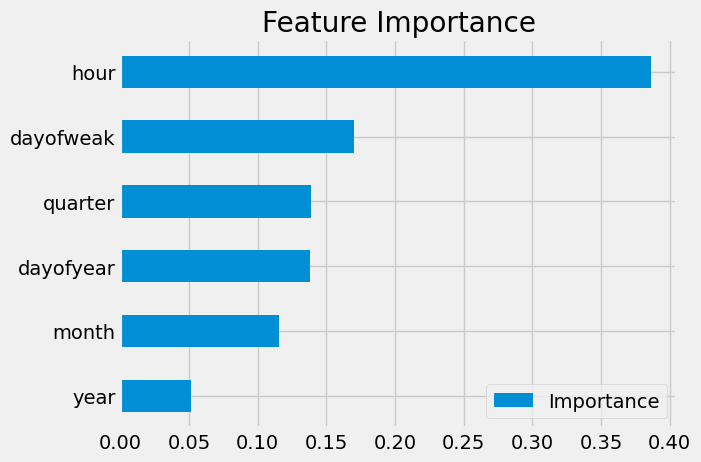

In [39]:
fi.sort_values('Importance').plot(kind = 'barh', title = 'Feature Importance')
plt.show()  # this is used when data is highly correlated this is help to i dentify feature importence

# Forecast on Tset

In [41]:
reg.predict(x_test)

array([15932.341, 12284.583, 12049.787, ..., 18131.04 , 17651.043,
       15826.243], dtype=float32)

In [40]:
test['prediction'] = reg.predict(x_test)

In [42]:
df

,AEP_MW,hour,dayofweak,quarter,month,year,dayofyear
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1


In [45]:
 df = df.merge(test[['prediction']], how = 'left', left_index = True , right_index = True)

In [46]:
df

,AEP_MW,hour,dayofweak,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,NaN
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,NaN
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,NaN
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,NaN
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,NaN
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1,18172.625000
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1,18172.625000
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1,18131.039062


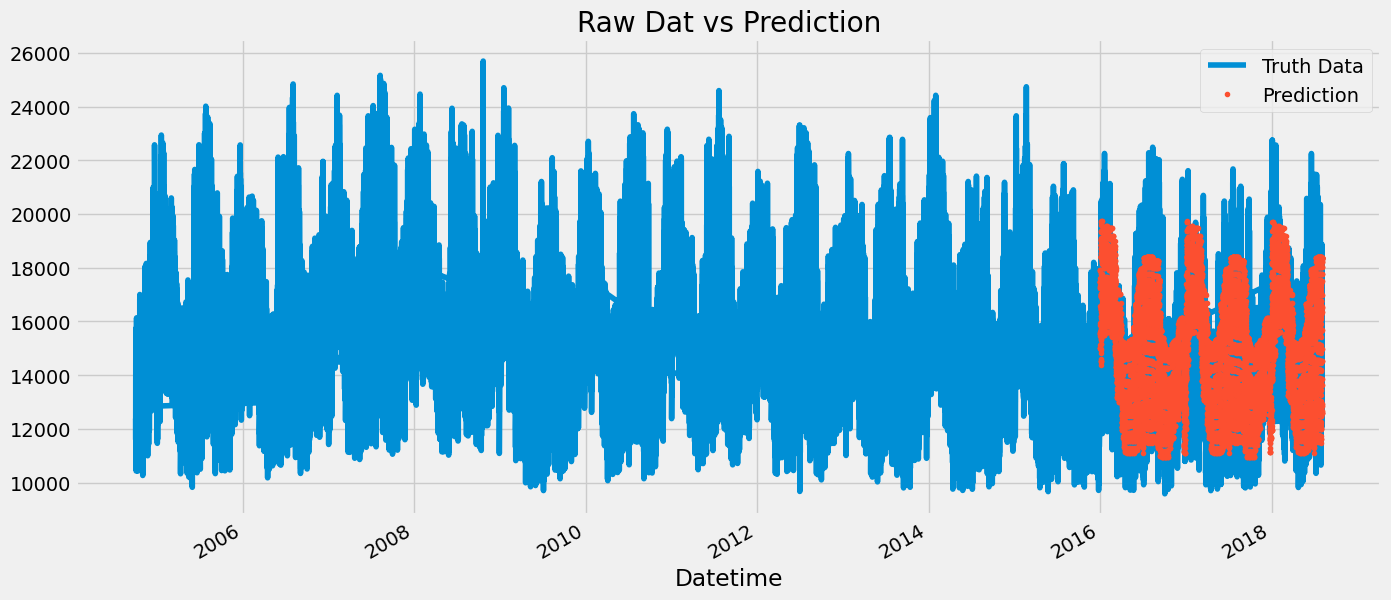

In [47]:
ax = df[['AEP_MW']].plot(figsize = (15, 7))
df['prediction'].plot(ax = ax, style = '.', label = 'Prediction')
ax.legend(['Truth Data', 'Prediction'])
ax.set_title('Raw Dat vs Prediction')
plt.show()

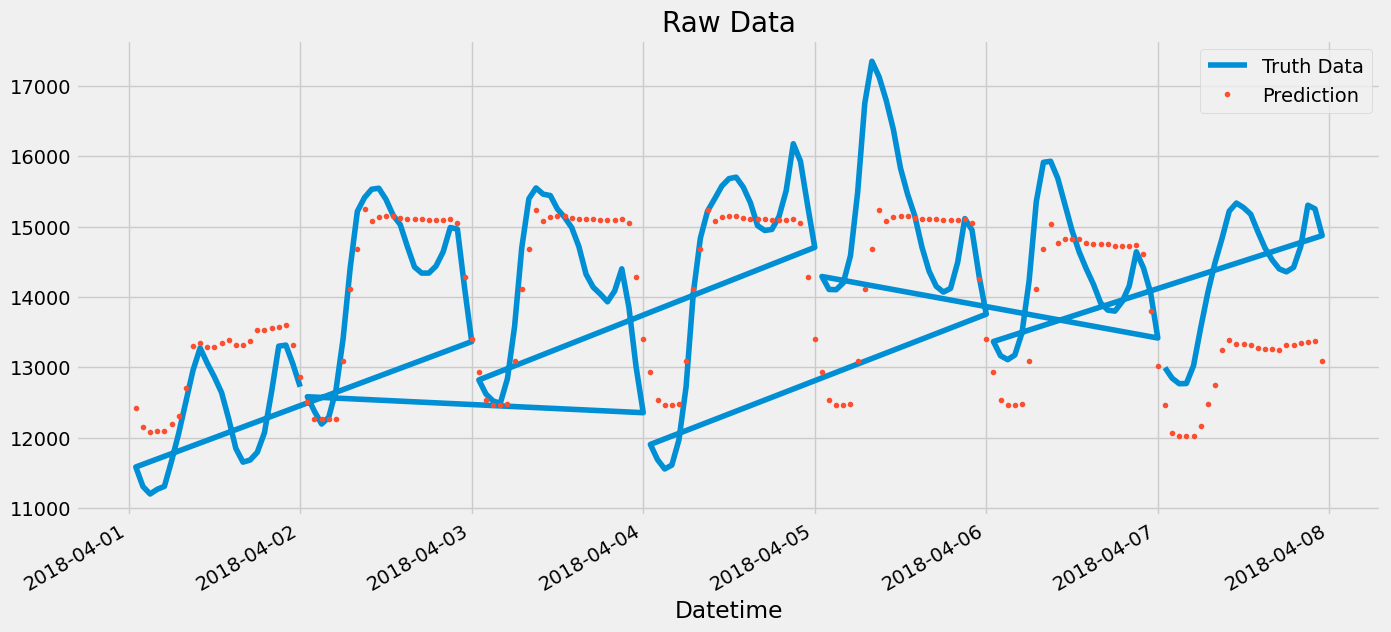

In [49]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW']\
  .plot(figsize = (15, 7), title = 'Raw Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction']\
  .plot(style = '.')

plt.legend(['Truth Data', 'Prediction'])
plt.show()

In [52]:
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1731.32


# Calculate Error
- look at the worst and best pedicted days



In [55]:
test['error'] = np.abs(test[TARGET]- test['prediction'])

In [56]:
test['date'] = test.index.date

In [57]:
test.groupby('date')['error'].mean().sort_values(ascending = False)

,error
date,
2017-12-28,5195.543538
2017-12-31,5014.337646
2016-12-16,4597.001872
2018-01-06,4532.140747
2018-02-20,4508.324870
...,...
2016-09-26,297.788452
2017-10-05,297.556437
2018-08-03,292.820312


In [58]:
test.groupby('date')['error'].mean().sort_values(ascending = True)

,error
date,
2016-12-03,272.226644
2017-03-18,282.711629
2018-08-03,292.820312
2017-10-05,297.556437
2016-09-26,297.788452
...,...
2018-02-20,4508.324870
2018-01-06,4532.140747
2016-12-16,4597.001872
